In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from numpy import savetxt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 11

In [39]:
#%matplotlib inline

In [40]:
data = pd.read_csv("data.csv")

In [41]:
print(data)

           filename       tempo  beats  chroma_stft      rmse  \
0    blues.00081.au  103.359375     50     0.380260  0.248262   
1    blues.00022.au   95.703125     44     0.306451  0.113475   
2    blues.00031.au  151.999081     75     0.253487  0.151571   
3    blues.00012.au  184.570312     91     0.269320  0.119072   
4    blues.00056.au  161.499023     74     0.391059  0.137728   
..              ...         ...    ...          ...       ...   
995   rock.00017.au  123.046875     59     0.418812  0.166056   
996   rock.00081.au  117.453835     56     0.335774  0.093676   
997   rock.00004.au  103.359375     45     0.372834  0.208743   
998   rock.00006.au  112.347147     45     0.344472  0.180163   
999   rock.00066.au   75.999540     36     0.360098  0.042995   

     spectral_centroid  spectral_bandwidth      rolloff  zero_crossing_rate  \
0          2116.942959         1956.611056  4196.107960            0.127272   
1          1156.070496         1497.668176  2170.053545      

In [42]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

In [43]:
data4 = data[(data["label"]=='blues') |  (data["label"]=='classical') | (data["label"]=='country') | (data["label"]=='disco')]

In [44]:
print(data4)

           filename       tempo  beats  chroma_stft      rmse  \
0    blues.00081.au  103.359375     50     0.380260  0.248262   
1    blues.00022.au   95.703125     44     0.306451  0.113475   
2    blues.00031.au  151.999081     75     0.253487  0.151571   
3    blues.00012.au  184.570312     91     0.269320  0.119072   
4    blues.00056.au  161.499023     74     0.391059  0.137728   
..              ...         ...    ...          ...       ...   
395  disco.00022.au  123.046875     58     0.436498  0.136937   
396  disco.00072.au  135.999178     67     0.434281  0.084527   
397  disco.00060.au  129.199219     63     0.434740  0.114553   
398  disco.00097.au  129.199219     64     0.415096  0.108158   
399  disco.00064.au  123.046875     60     0.388141  0.092271   

     spectral_centroid  spectral_bandwidth      rolloff  zero_crossing_rate  \
0          2116.942959         1956.611056  4196.107960            0.127272   
1          1156.070496         1497.668176  2170.053545      

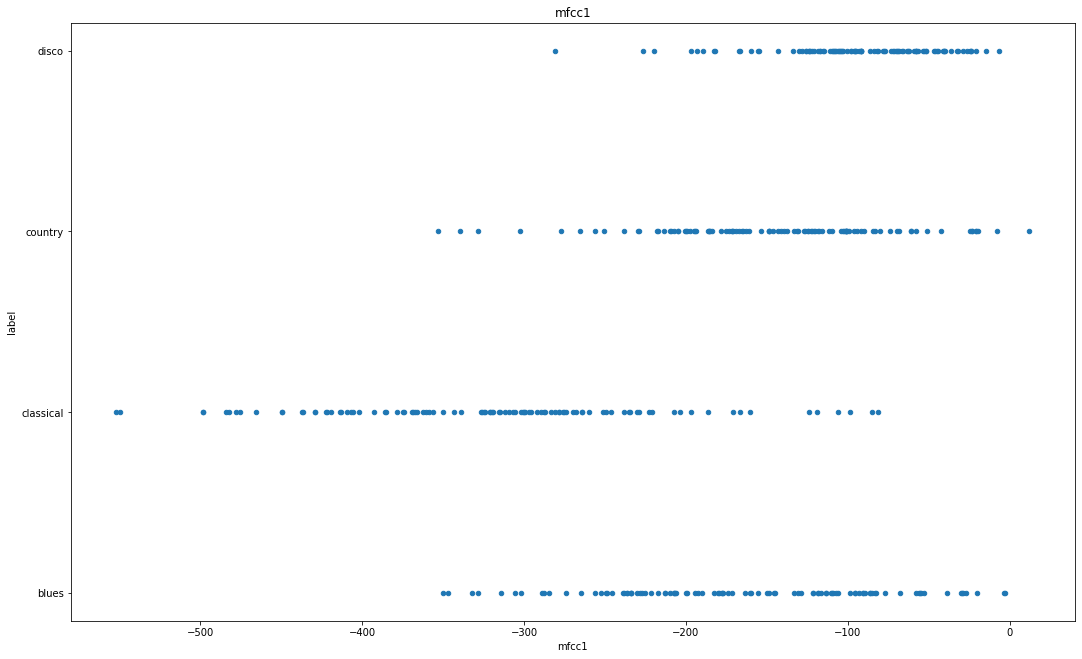

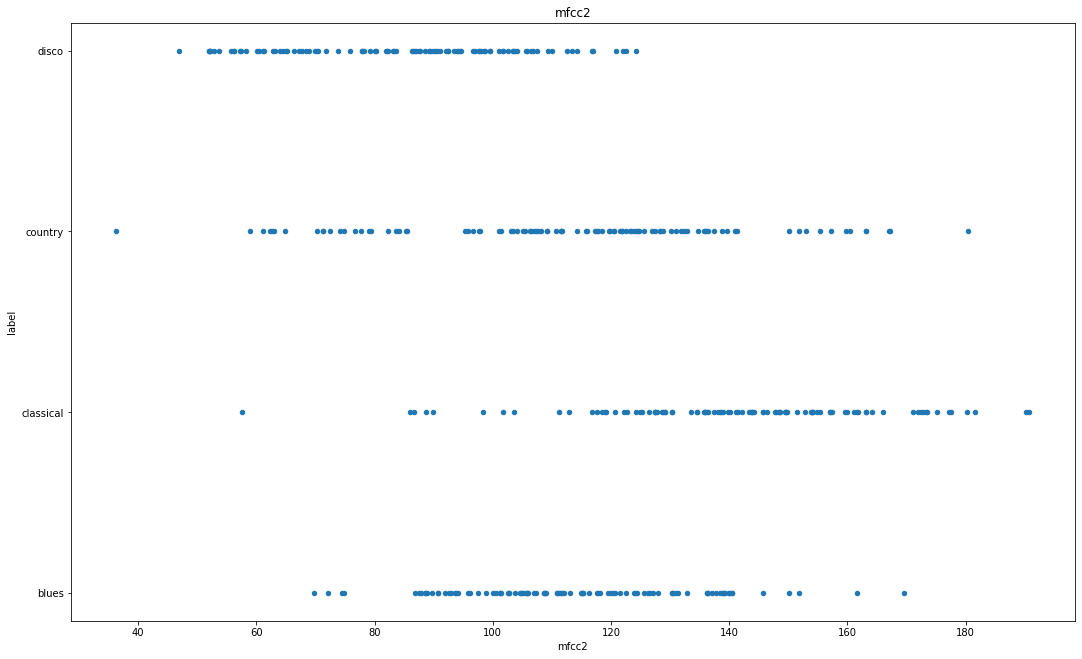

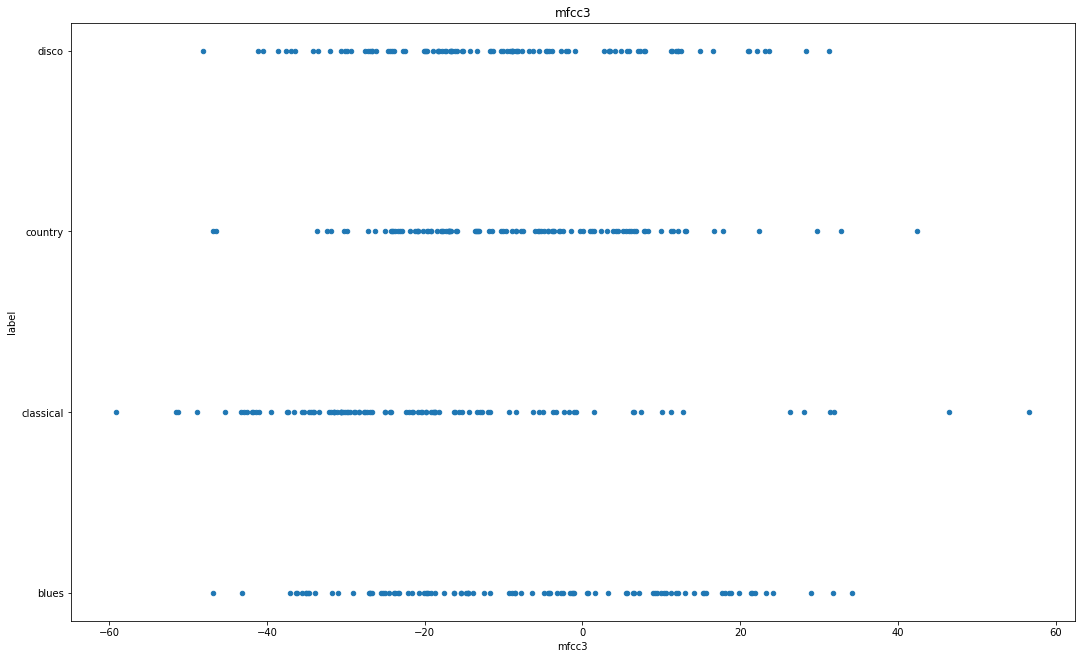

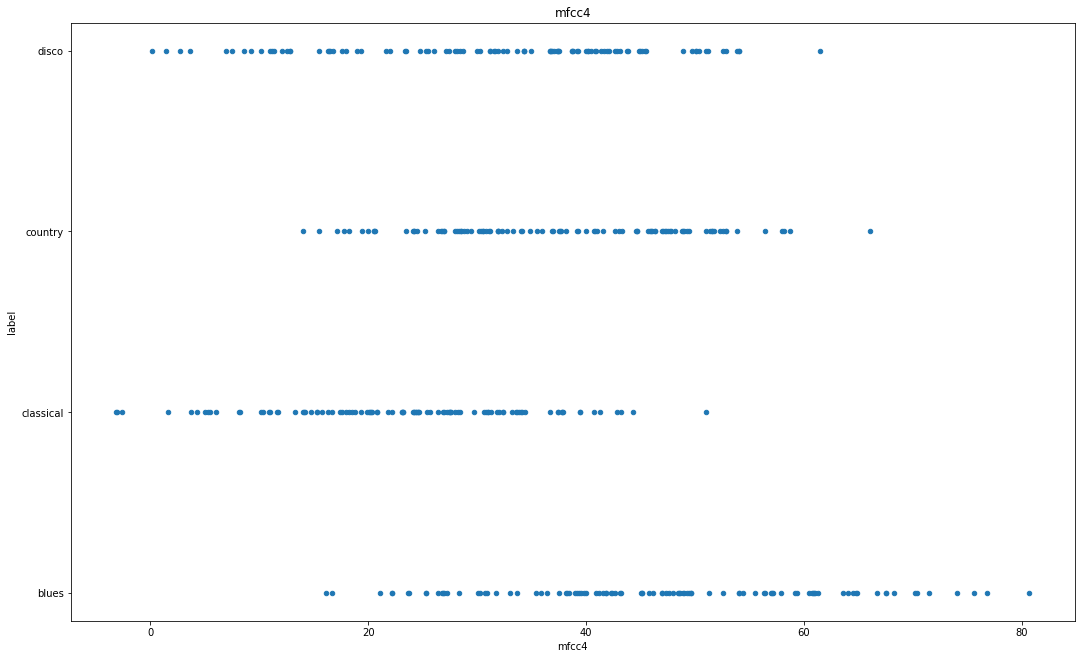

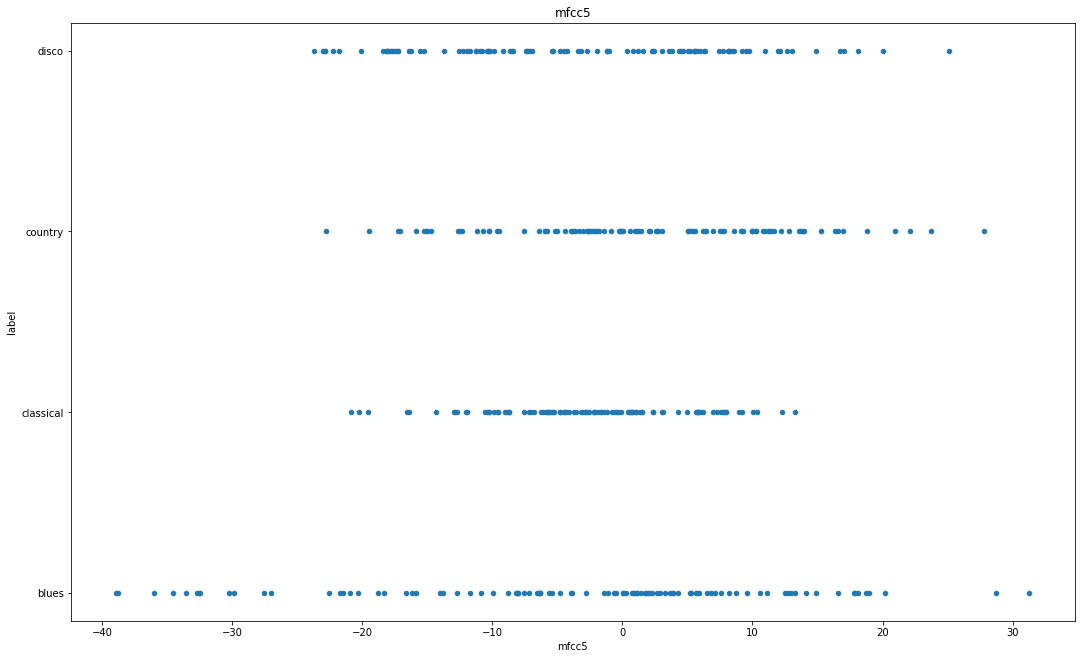

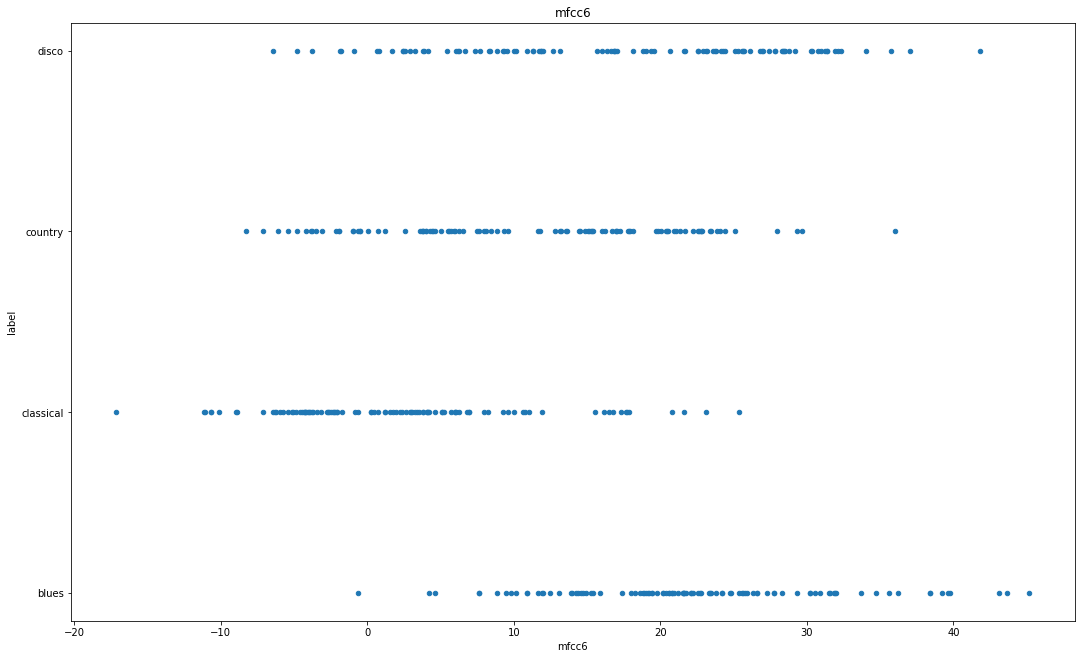

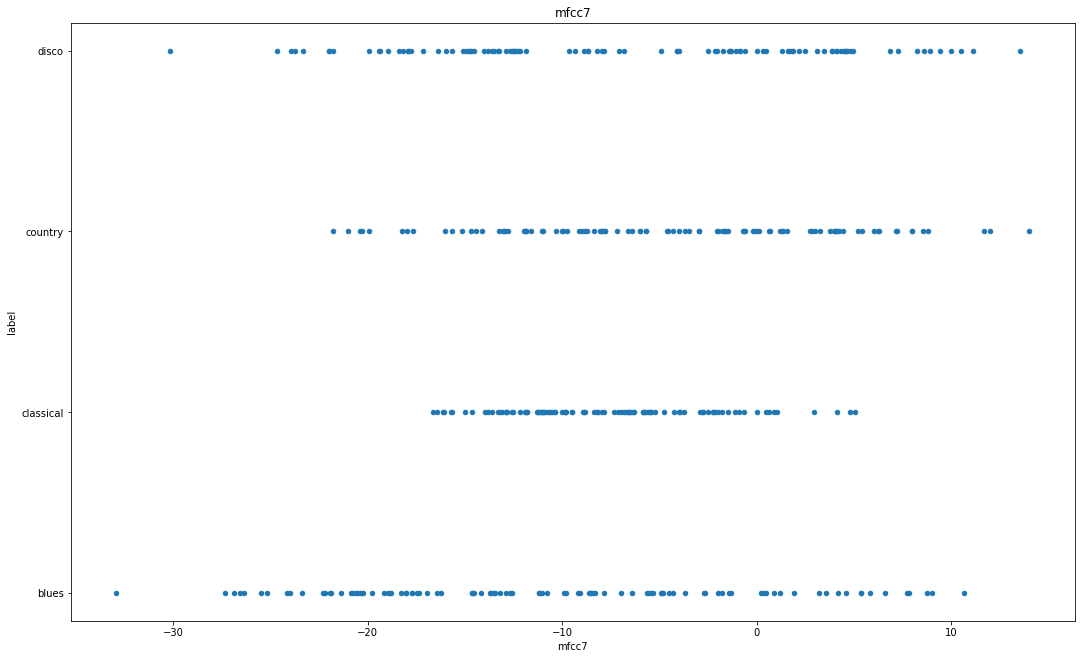

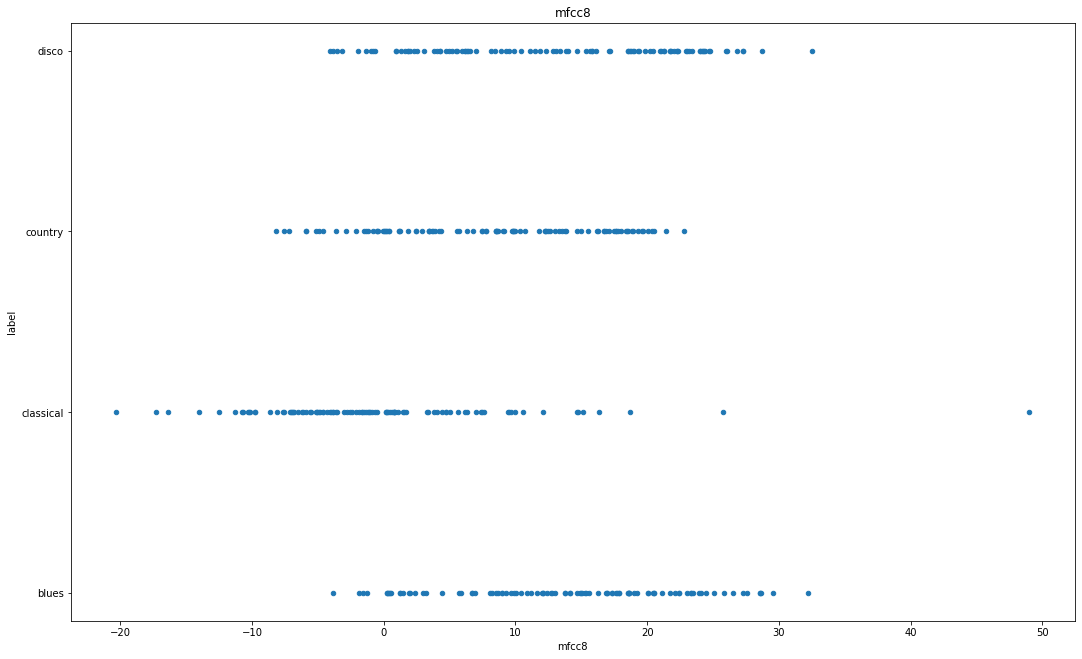

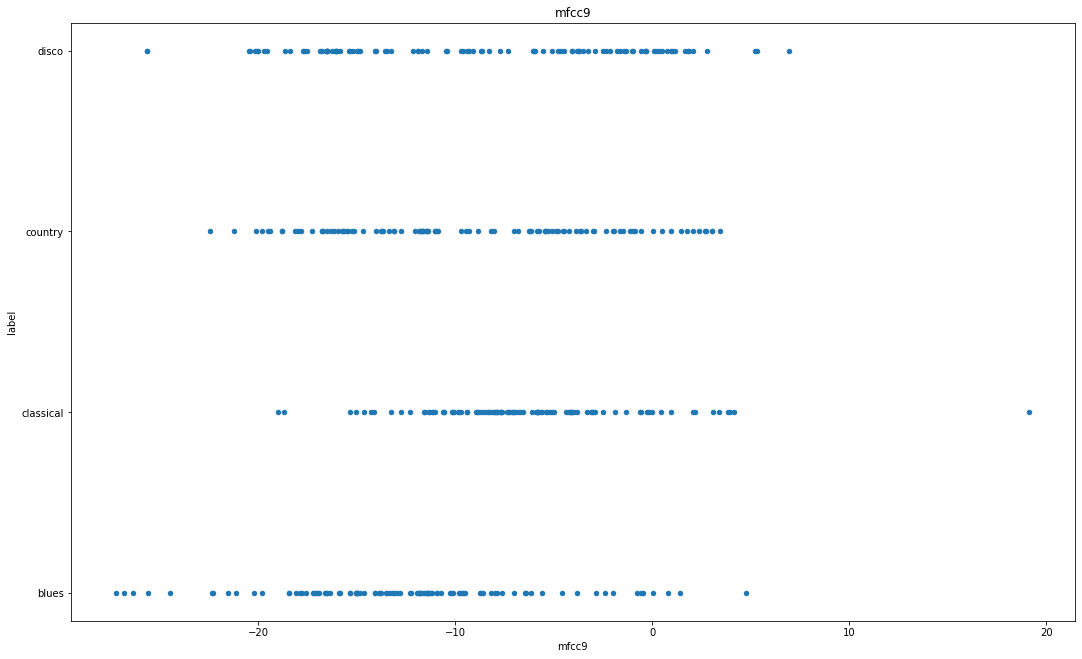

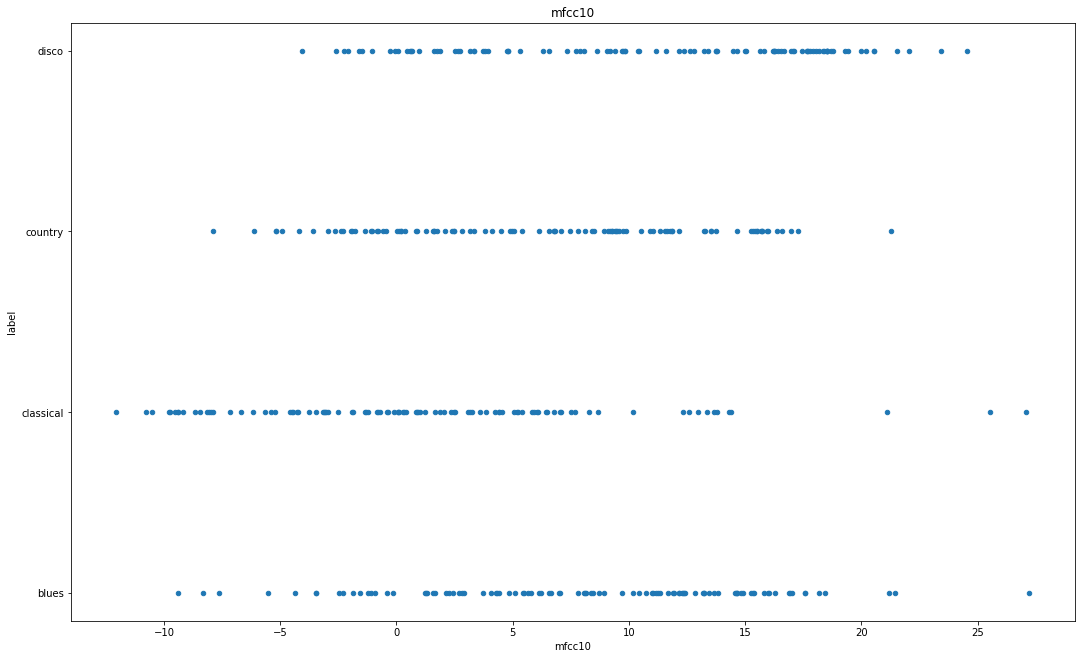

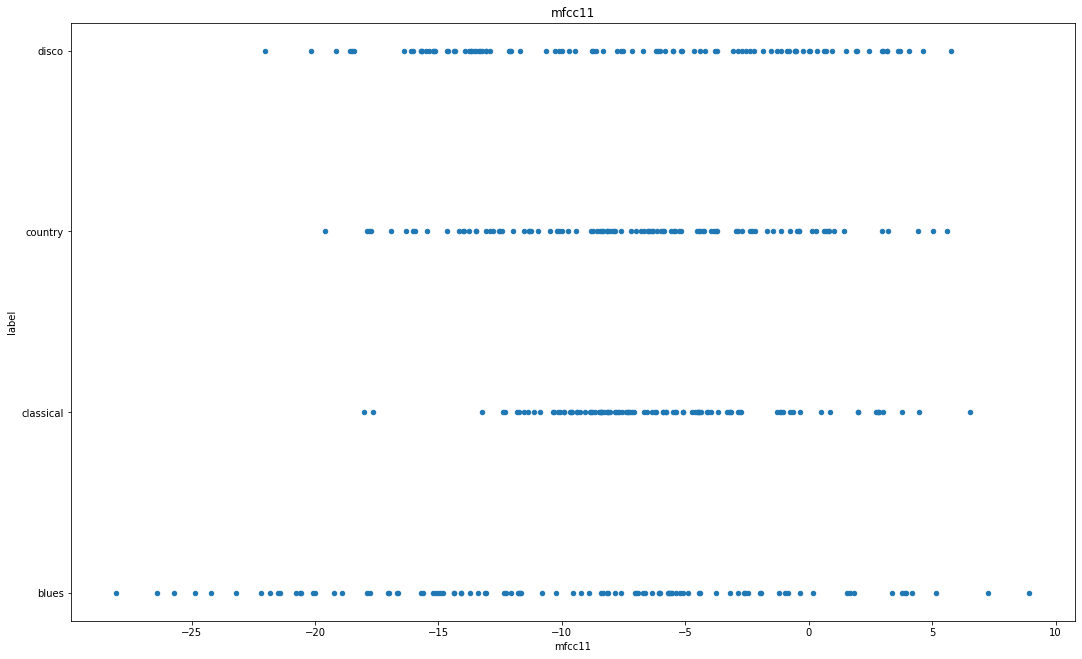

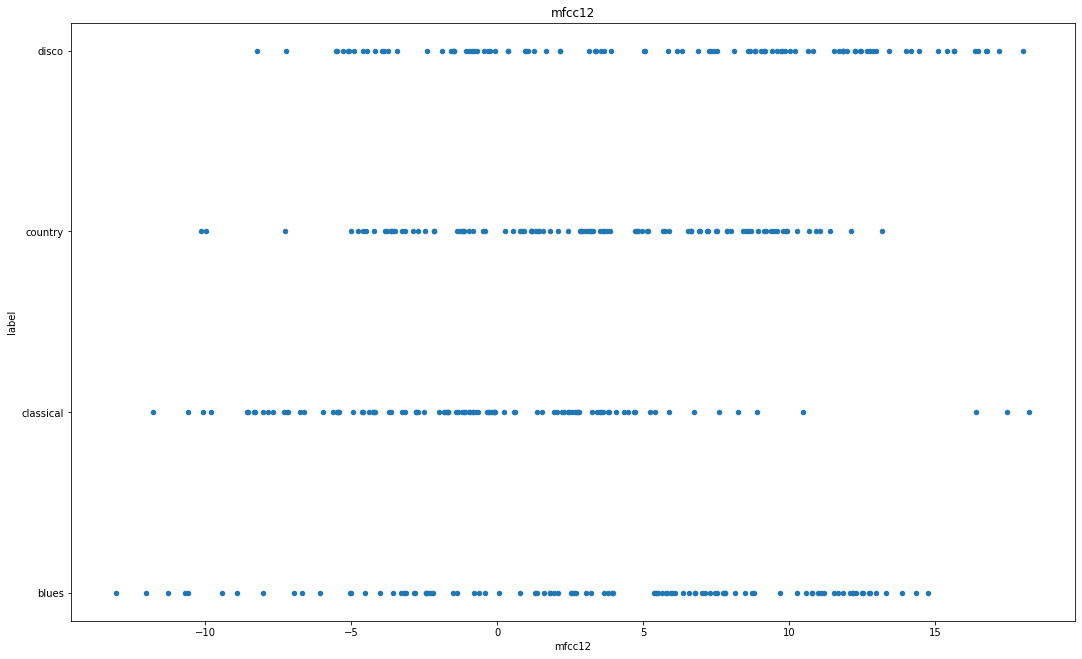

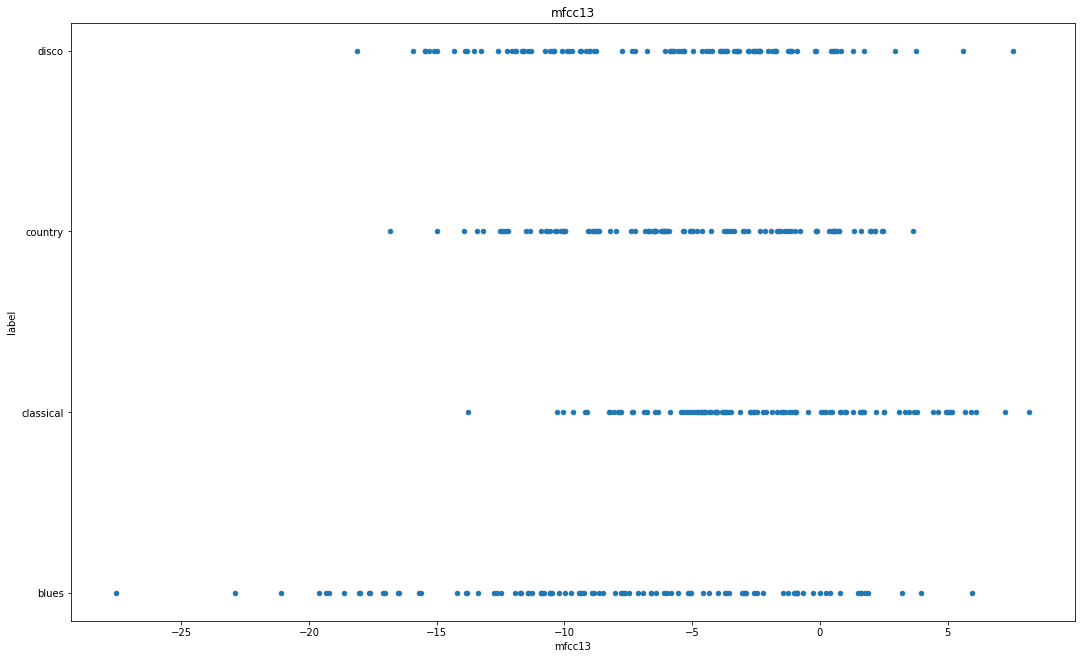

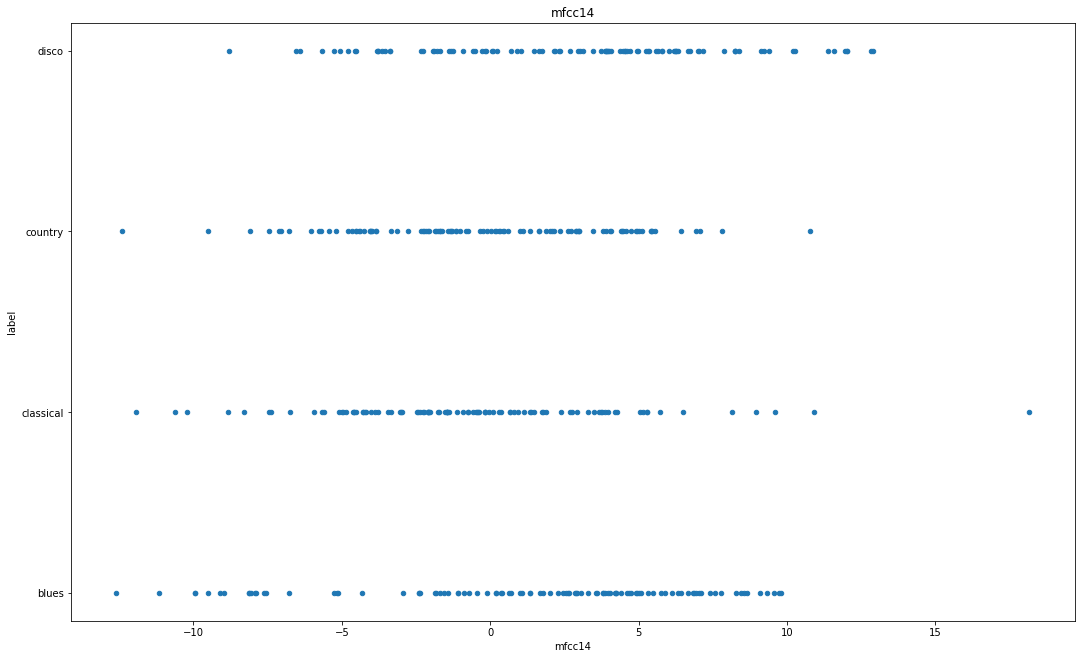

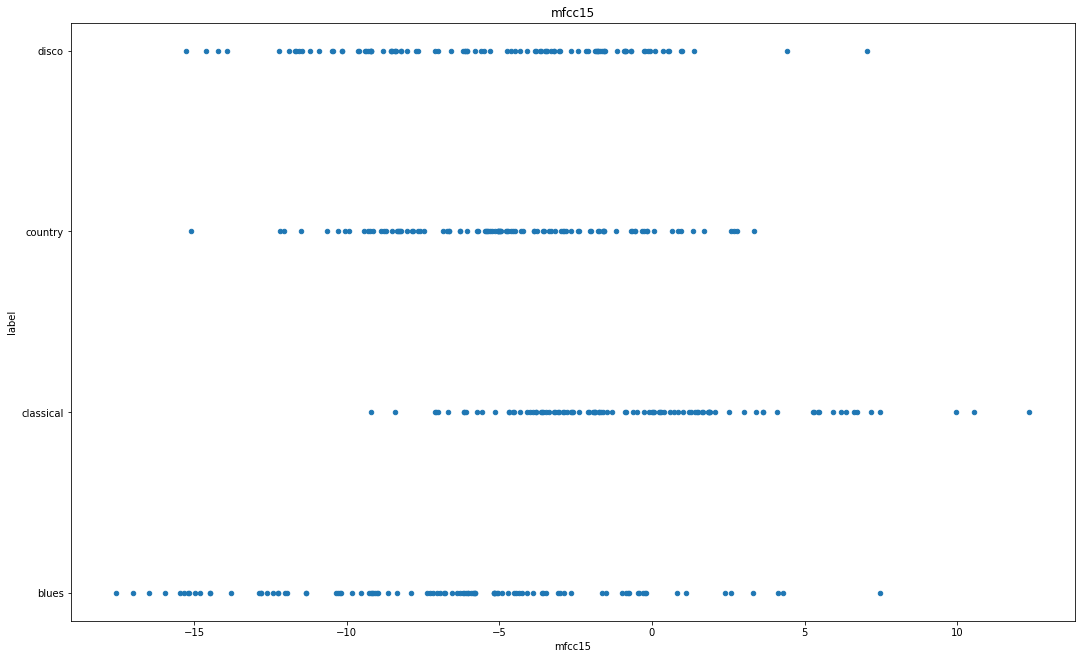

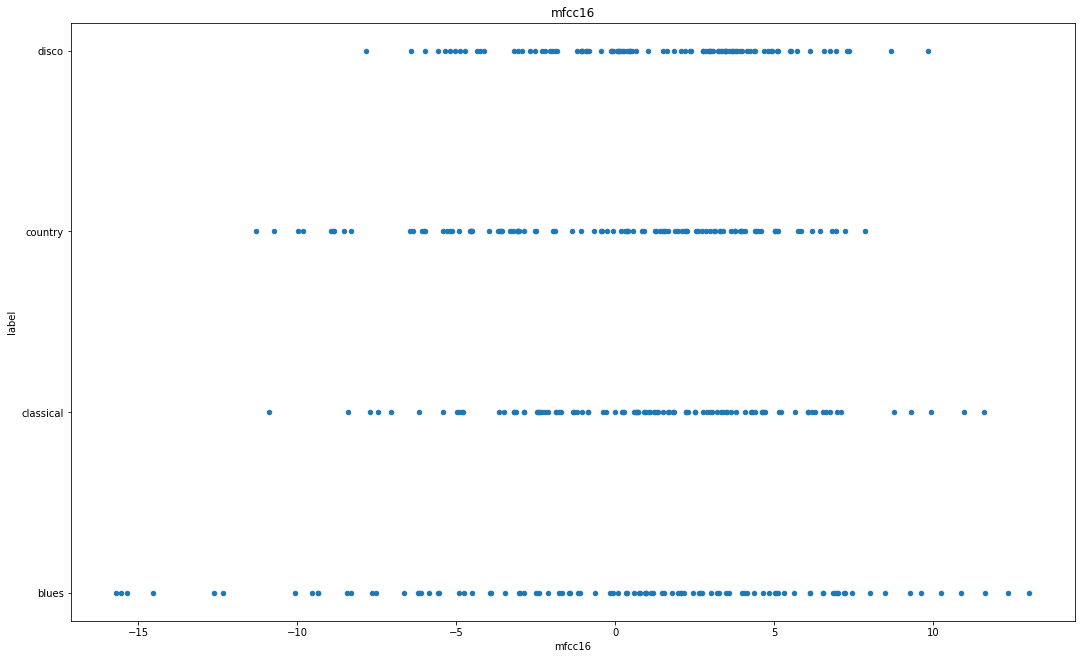

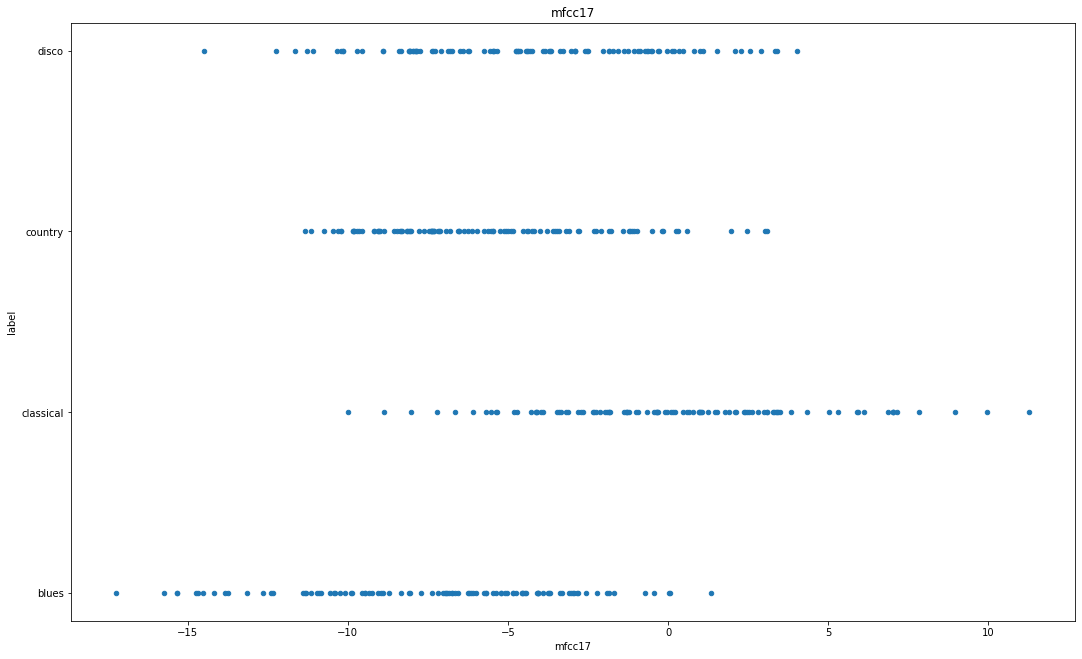

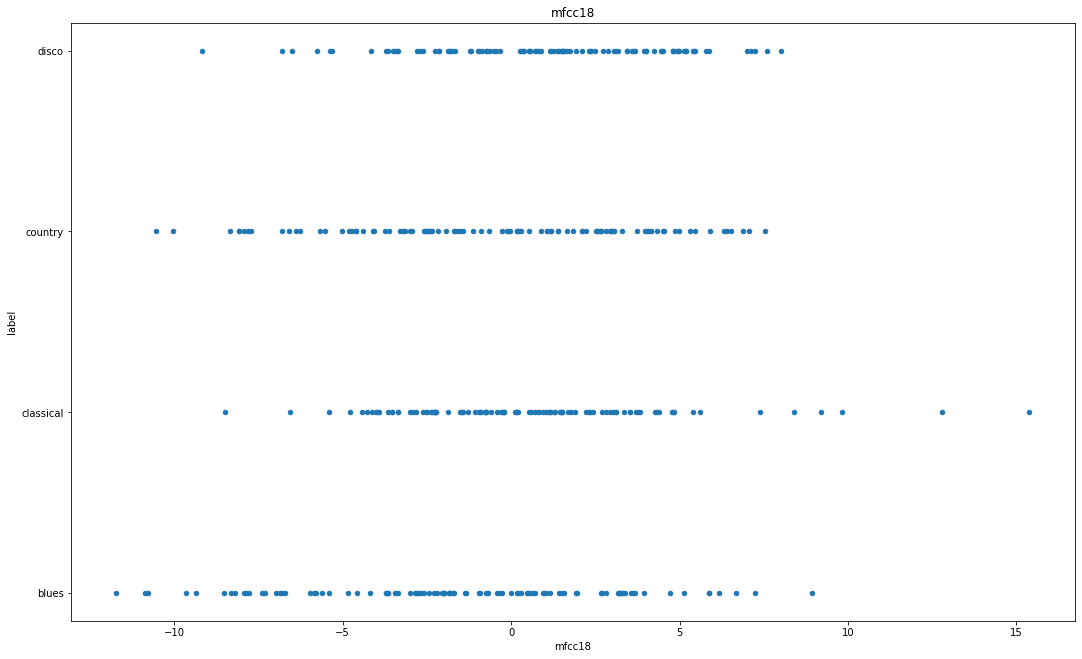

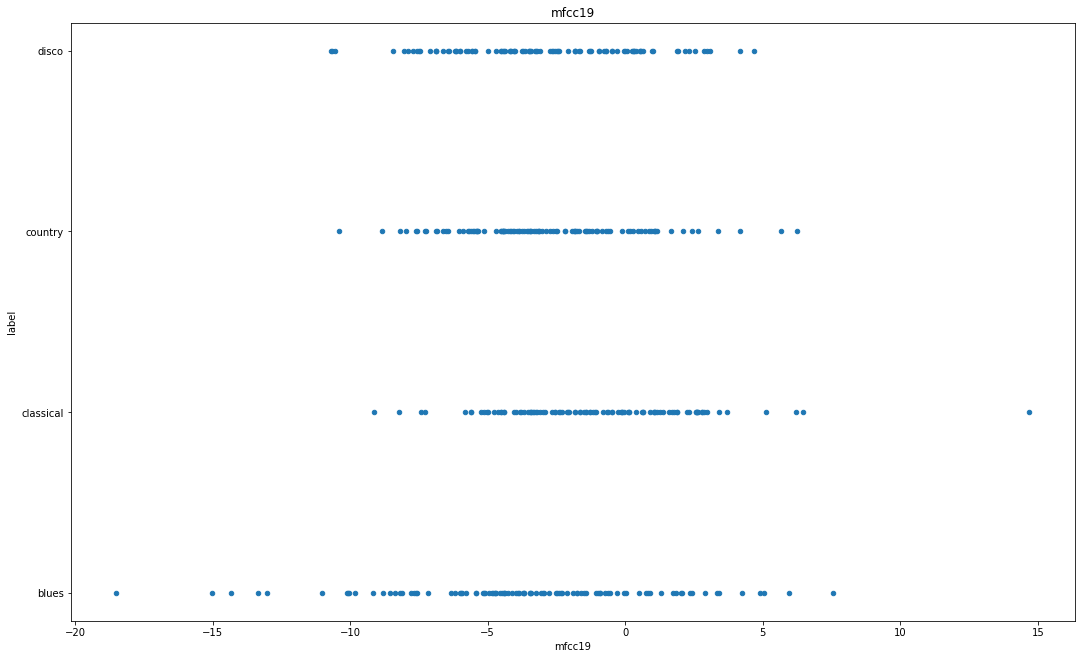

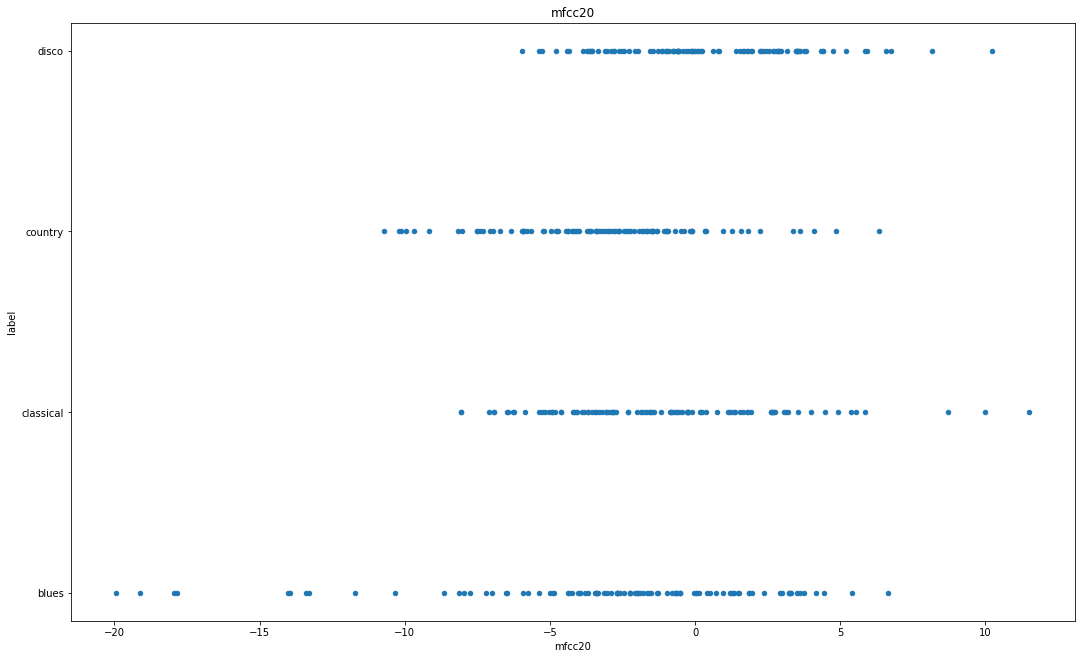

In [45]:
for i in range(1,21):
    data4.plot(kind='scatter',x='mfcc'+str(i),y='label',title='mfcc'+str(i))
    plt.show()

In [59]:
rcParams['figure.figsize'] = 12, 6

mfcc1


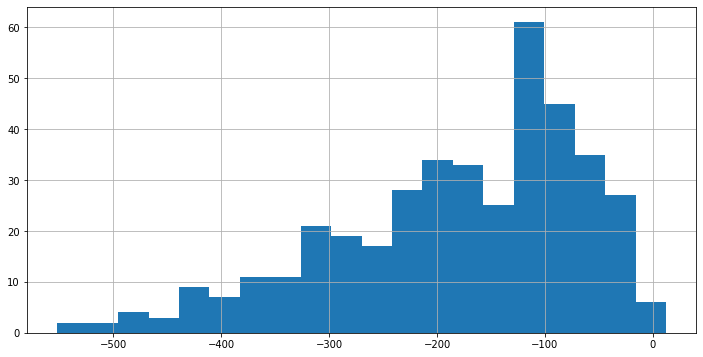

mfcc2


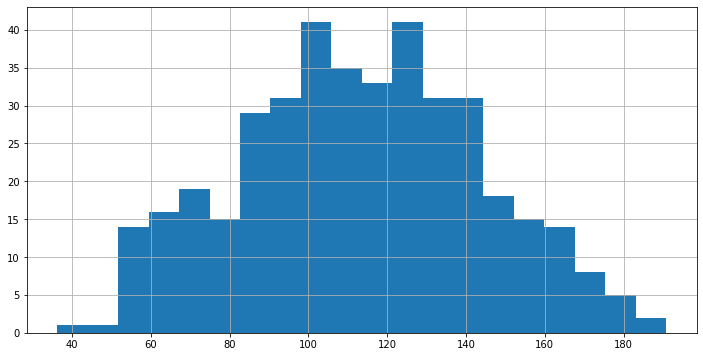

mfcc3


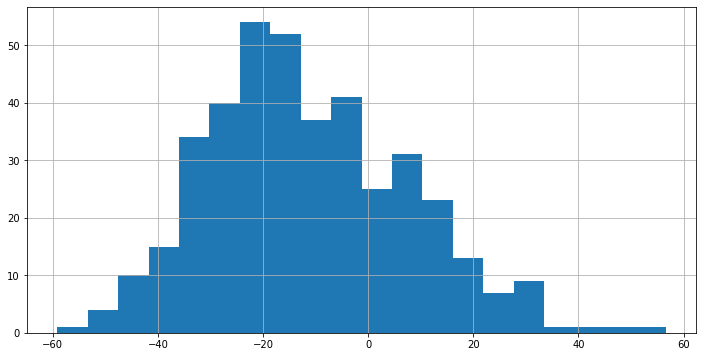

mfcc4


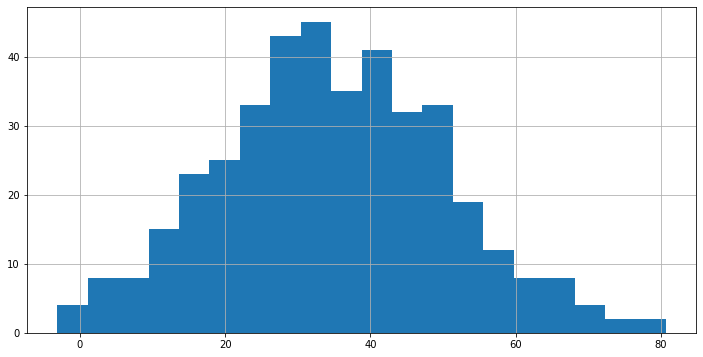

mfcc5


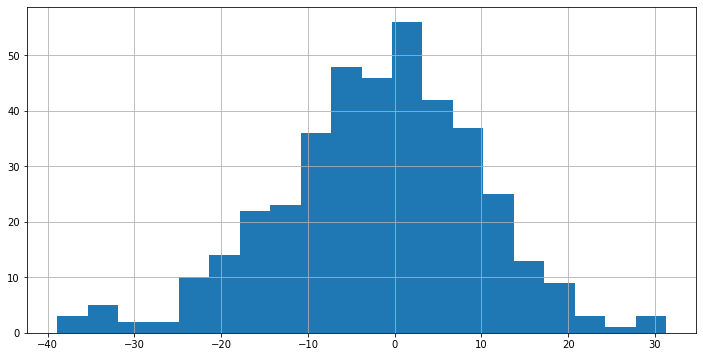

mfcc6


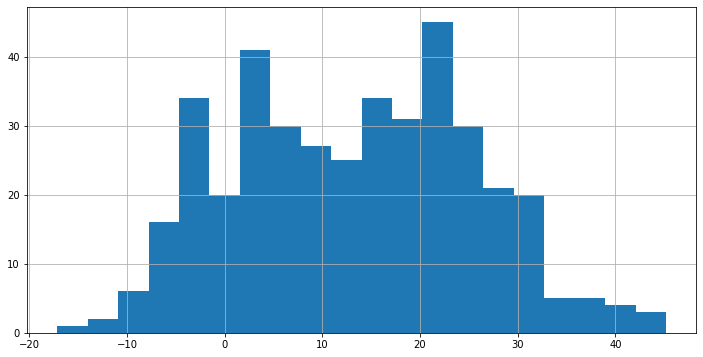

mfcc7


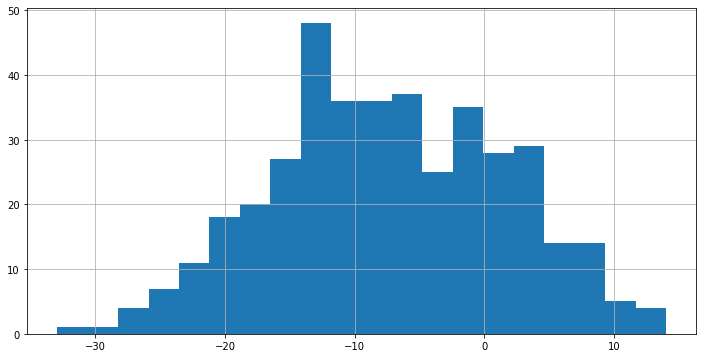

mfcc8


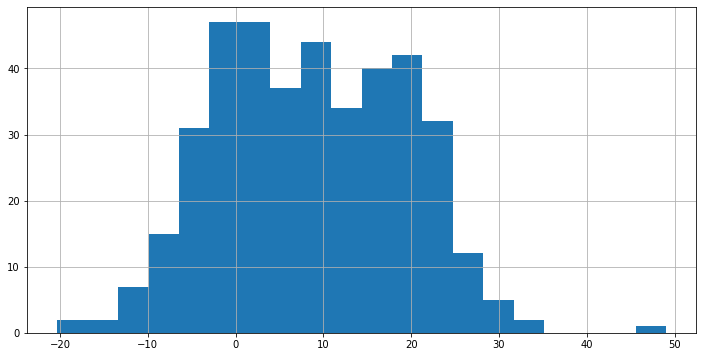

mfcc9


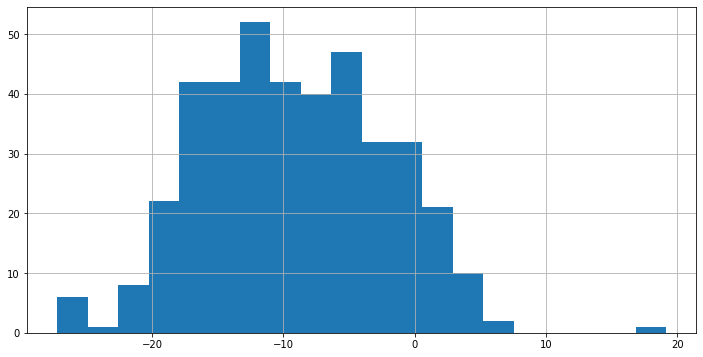

mfcc10


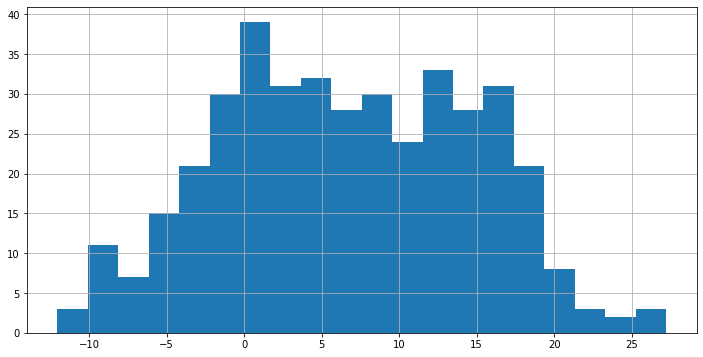

mfcc11


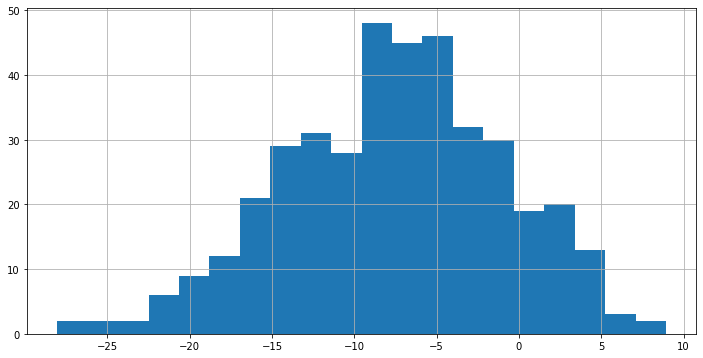

mfcc12


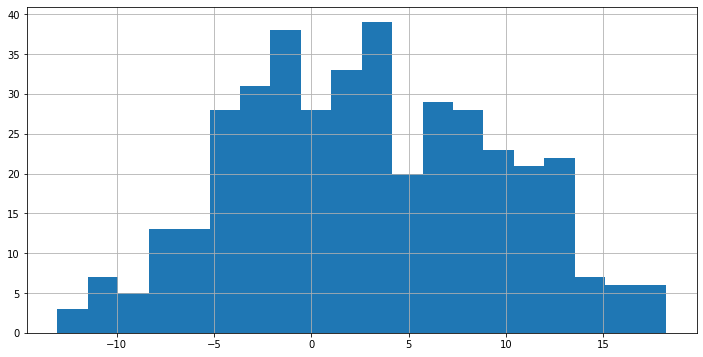

mfcc13


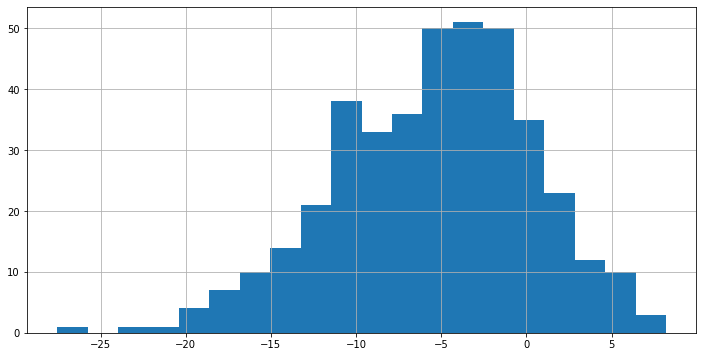

mfcc14


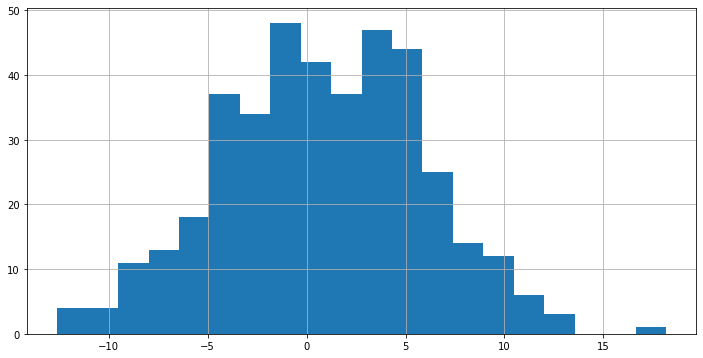

mfcc15


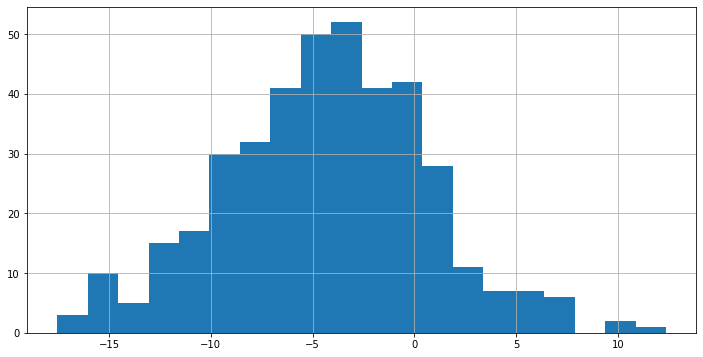

mfcc16


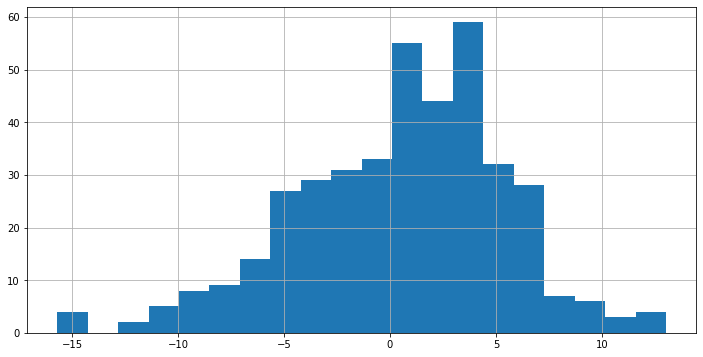

mfcc17


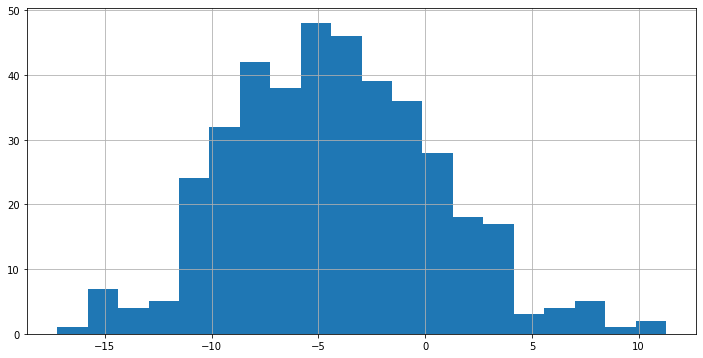

mfcc18


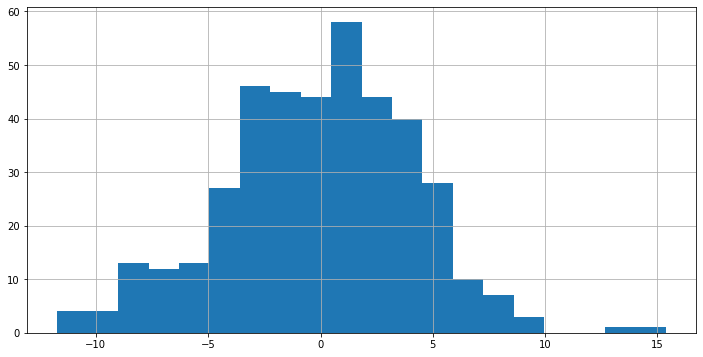

mfcc19


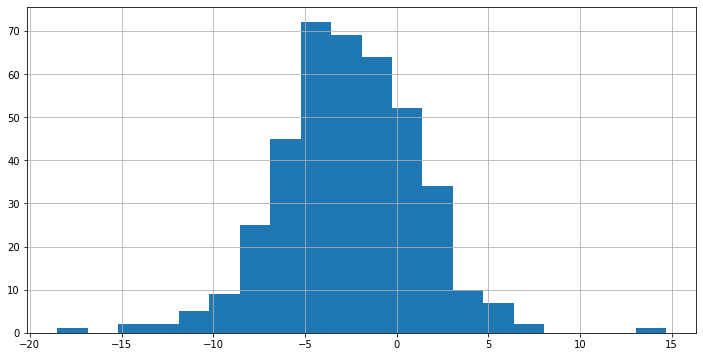

mfcc20


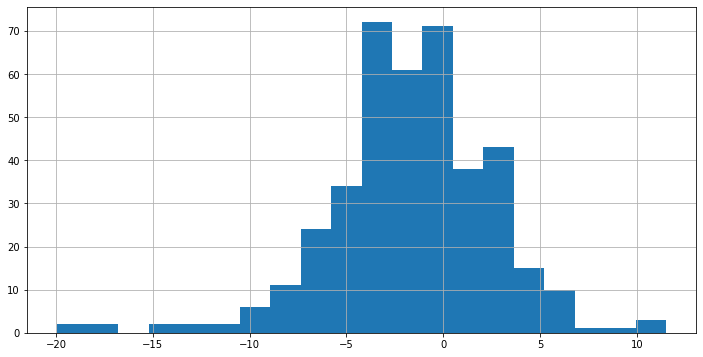

In [63]:
for i in range(1,21):
    print('mfcc'+str(i))
    data4['mfcc'+str(i)].hist(bins=20)
    plt.show()

In [72]:
data4.groupby(['label']).count()

filename  tempo  beats  chroma_stft  rmse  spectral_centroid  \
label                                                                     
blues           100    100    100          100   100                100   
classical       100    100    100          100   100                100   
country         100    100    100          100   100                100   
disco           100    100    100          100   100                100   

           spectral_bandwidth  rolloff  zero_crossing_rate  mfcc1  ...  \
label                                                              ...   
blues                     100      100                 100    100  ...   
classical                 100      100                 100    100  ...   
country                   100      100                 100    100  ...   
disco                     100      100                 100    100  ...   

           mfcc11  mfcc12  mfcc13  mfcc14  mfcc15  mfcc16  mfcc17  mfcc18  \
label                                                                       
blues         100     100     100     100     100     100     100     100   
classical     100     100     100     100     100     100     100     100   
country       100     100     100     100     100     100     100     100   
disco         100     100     100     100     100     100     100     100   

           mfcc19  mfcc20  
label                      
blues         100     100  
classical     100     100  
country       100     100  
disco         100     100  

[4 rows x 29 columns]

In [75]:
import seaborn as sns

In [92]:
sample_df=data4[['tempo','beats','chroma_stft','rmse','spectral_centroid','spectral_bandwidth','rolloff','zero_crossing_rate','label']]

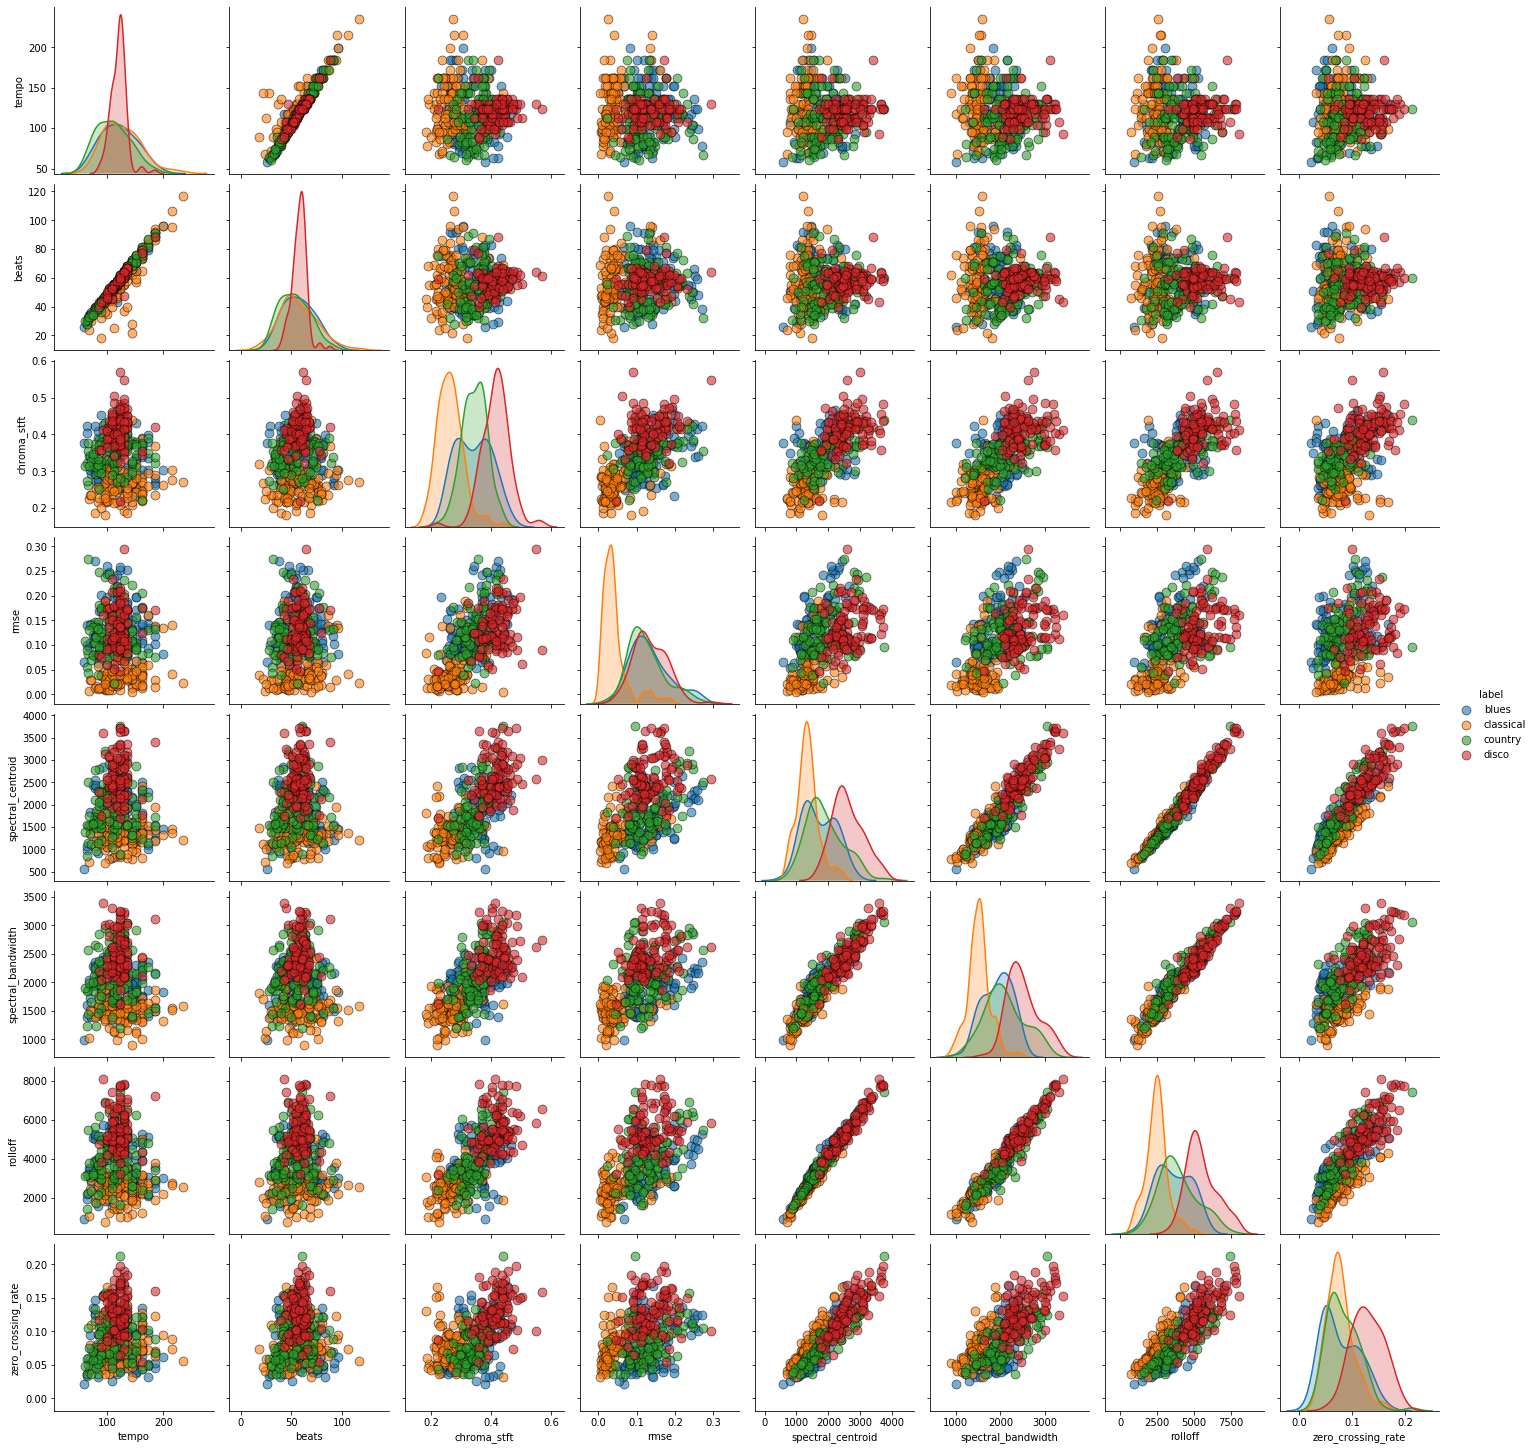

In [103]:
sns.pairplot(sample_df,hue='label',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

In [77]:
rcParams['figure.figsize'] = 50, 40

In [97]:
mfcc = []
for i in range(1,21):
    mfcc.append('mfcc'+str(i))

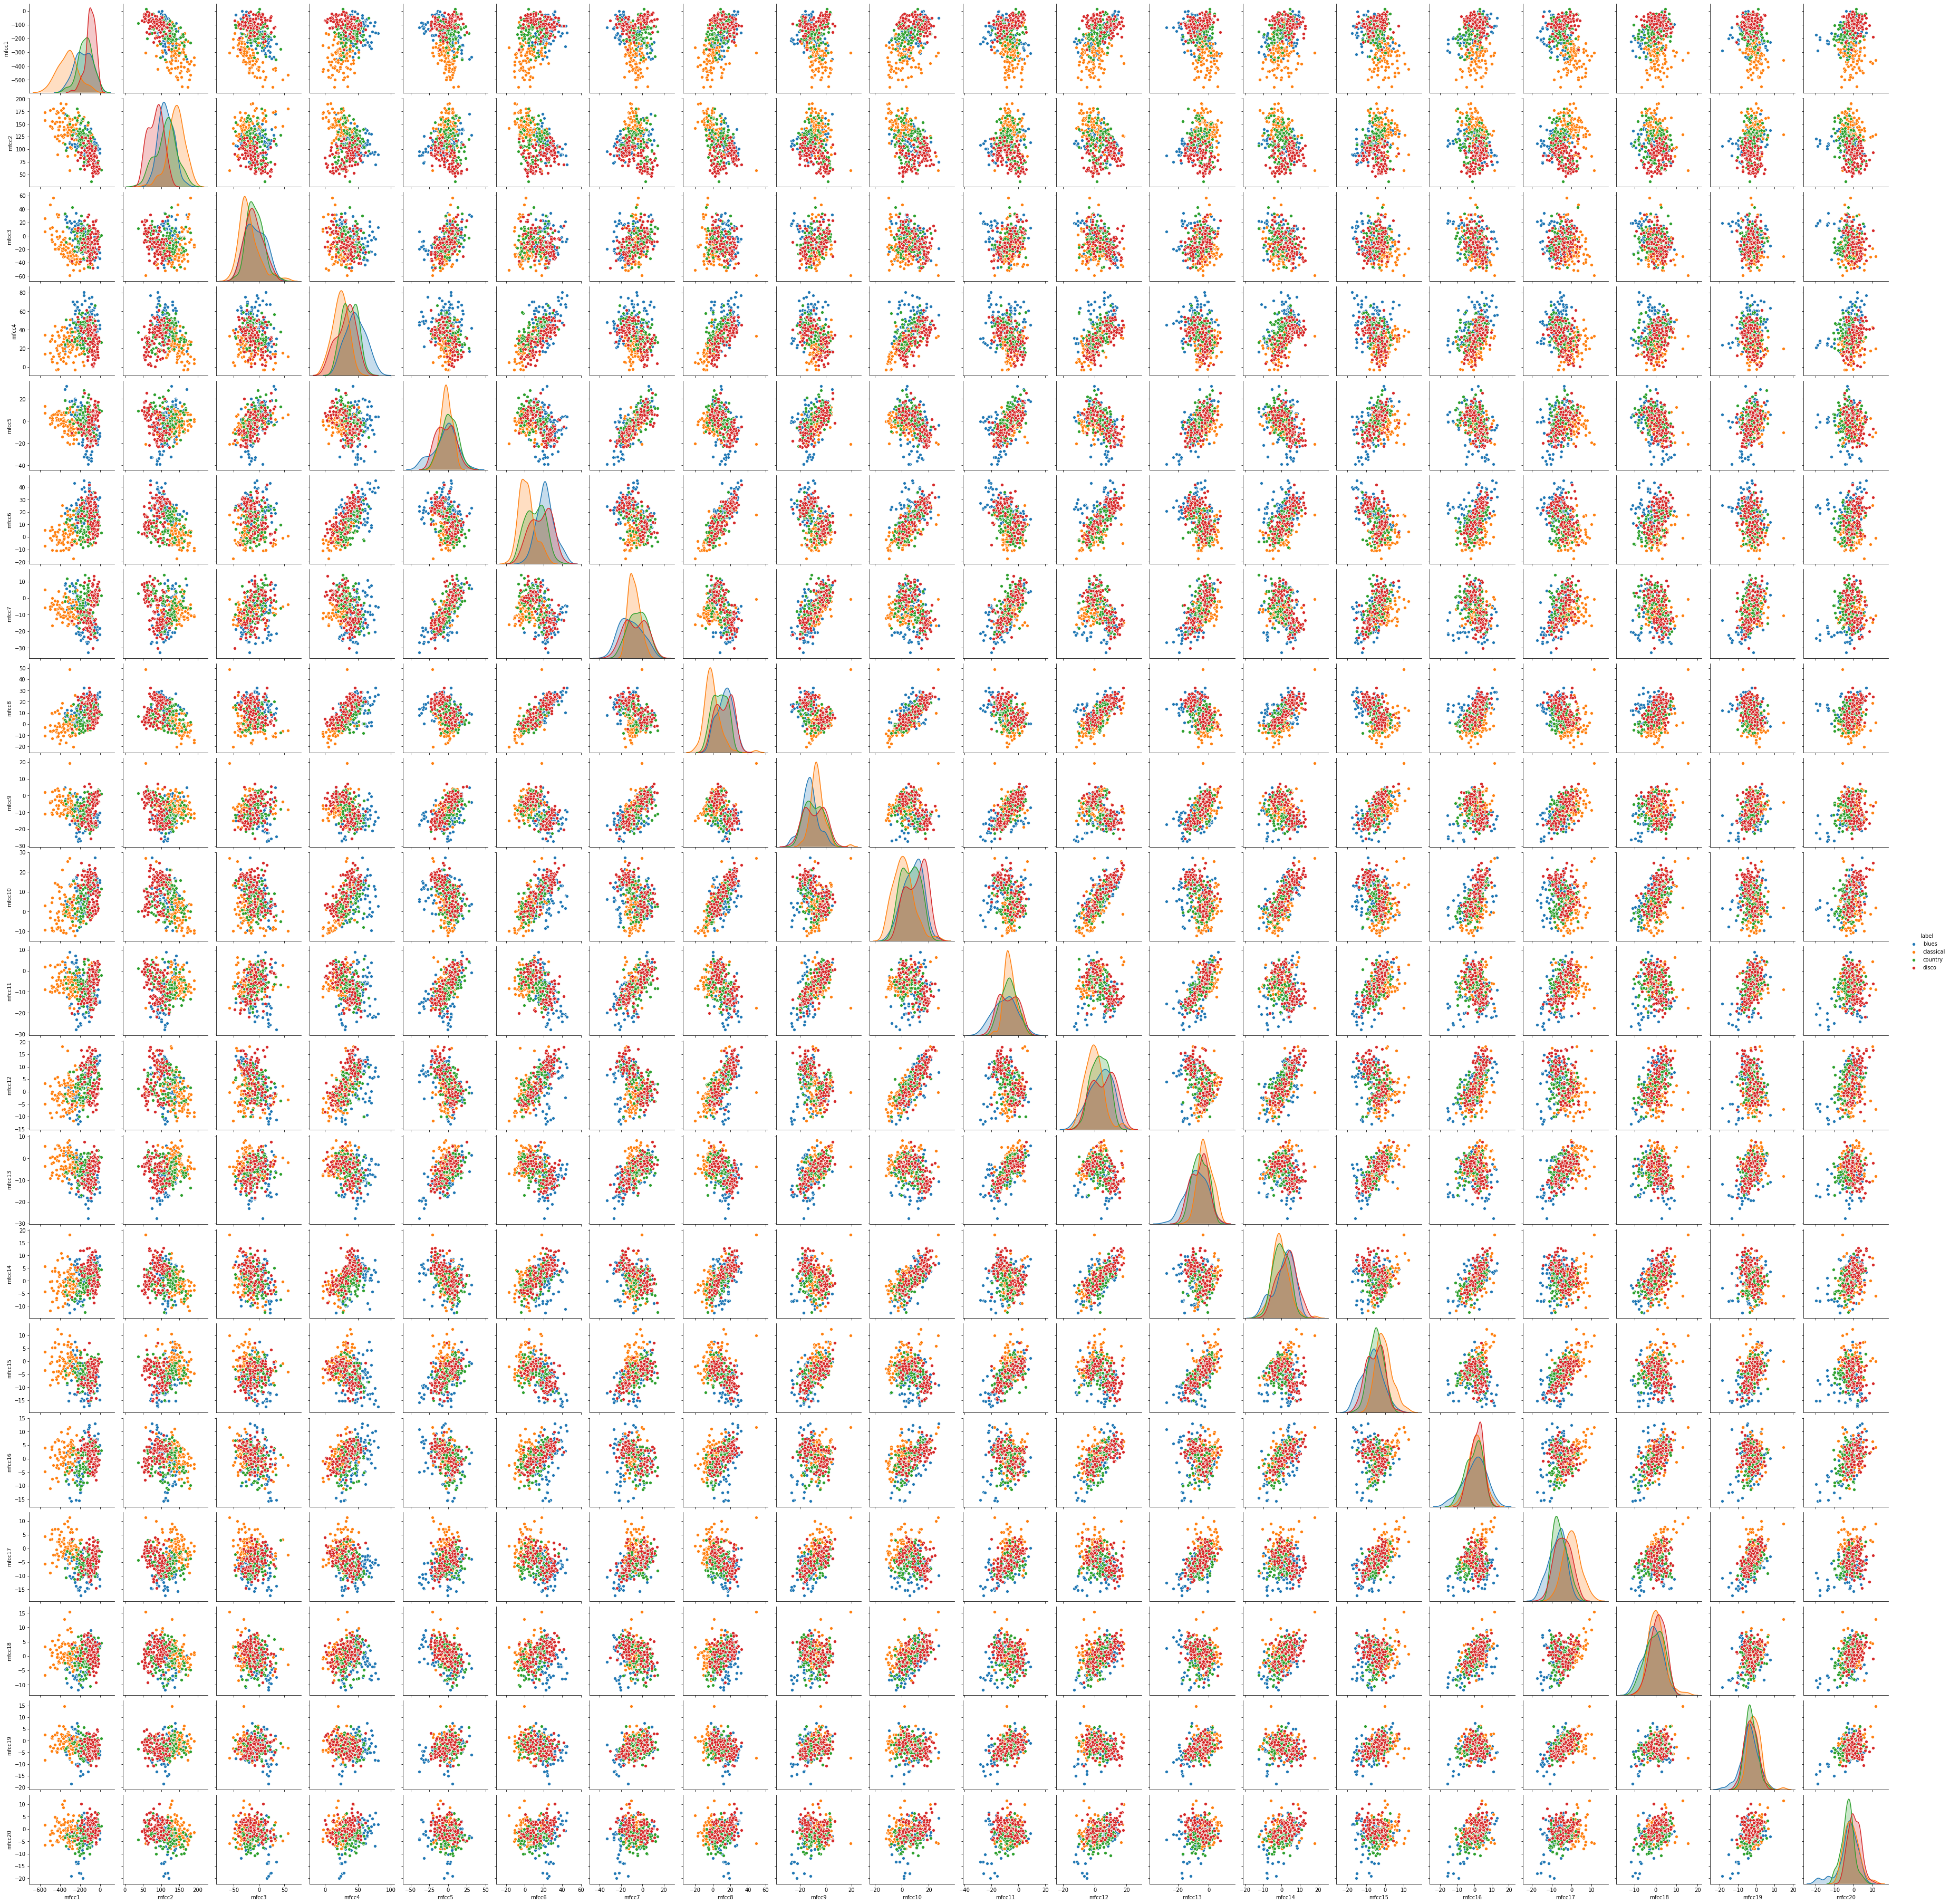

In [99]:
sns.pairplot(data4,hue='label',vars=mfcc)

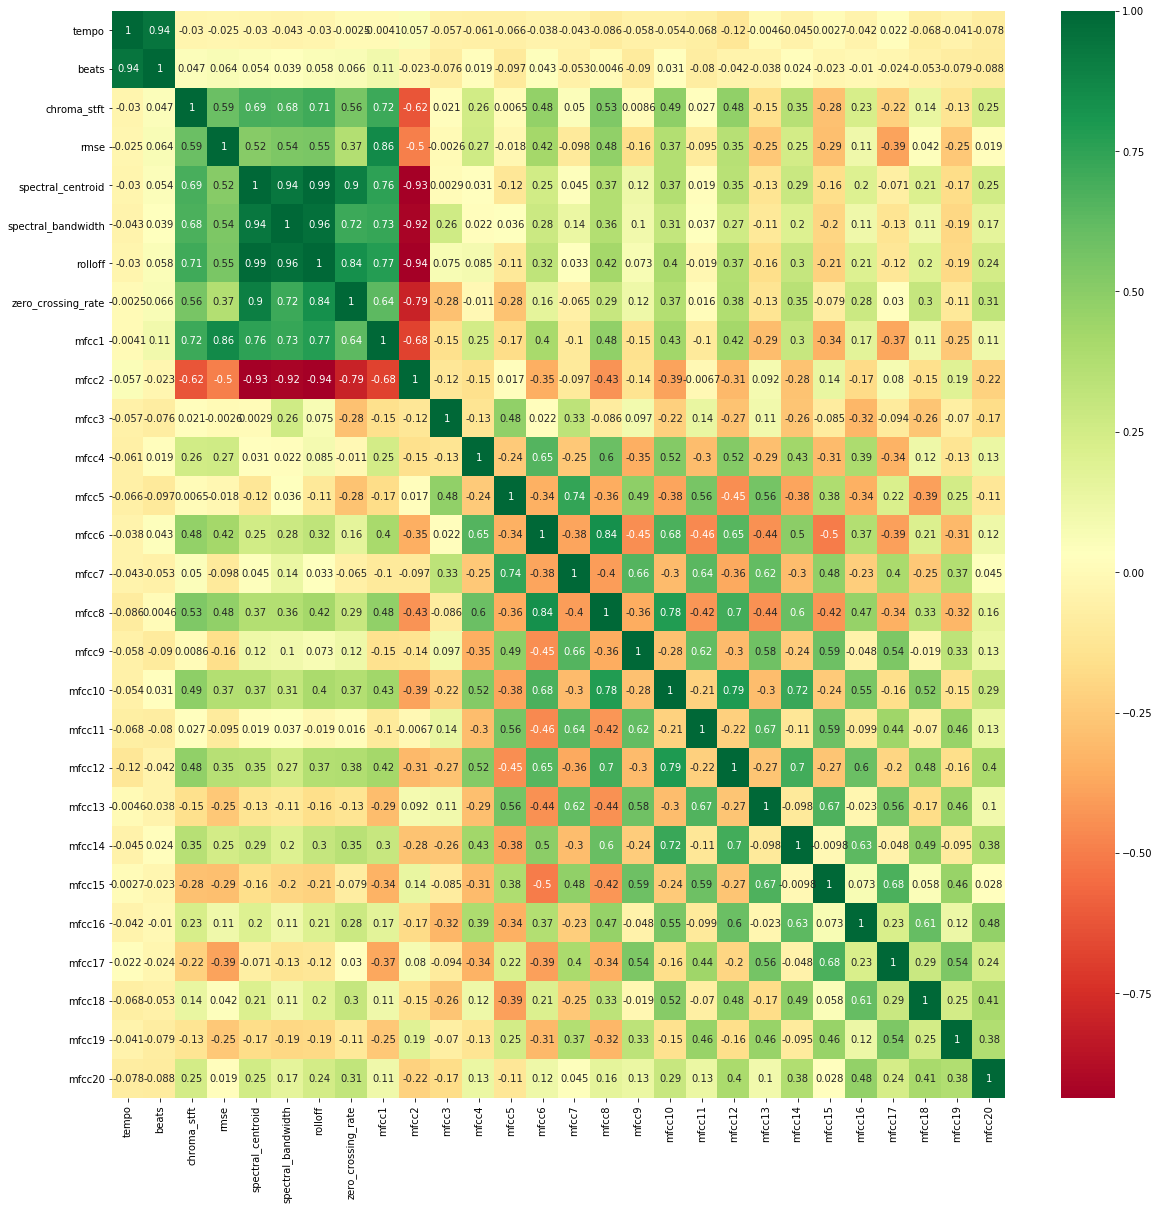

In [102]:
corrmat = data4.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data4[top_corr_features].corr(),annot=True,cmap="RdYlGn")